#### Title: 
Sprint 4 Project: Software Development Tools, EDA (Exploratory Data Analysis)

#### Importing Libraries And Uploading DataSet

In [1]:
#Import all the necessary libraries.
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import random

import plotly.express as px

In [2]:
#Import the dataset using pd.read_csv() function.
df = pd.read_csv('vehicles_us.csv')

#Use the head() method to print the first five rows of the dataset.
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Code Result:  The information in the rows seem to be listed correctly, but there seems to be missing values.

#### Handling Missing Values

In [3]:
#Use the isna() and sum() functions in order to count the number of missing values in the dataframe.
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Code Result:  There seems to be a significant amount of missing values in the dataframe.  The values should
be renamed instead of deleted in order not to lose any significant information.

In [4]:
#Use the groupby(), transform(), and fillna() methods in order to fill in the missing values in the cylinders 
#column with the median value for each row.
df['cylinders'] = df[['cylinders', 'type']].groupby('type').transform(lambda x:x.fillna(x.median()))

#Check for the number of missing values in the cylinders column with the .isna() and .sum() methods.
df['cylinders'].isna().sum()

0

Code Result:  No missing values noted in the cylinders column.  The missing values were filled successfully.

In [5]:
#Use the groupby(), transform(), and fillna() methods in order to fill in the missing values in the odometer 
#column with the mean value for each row
df['odometer'] = df.groupby('type')['odometer'].transform(lambda x: x.fillna(x.mean()))

#Check for the number of missing values in the odometer column with the .isna() and .sum() methods.
df['odometer'].isna().sum()

0

Code Result:  There are no longer missing values noted in the odometer column.  The missing values were converted successfully.

In [6]:
#Use the groupby(), transform(), and fillna() methods in order to fill in the missing values in the model_year 
#column with the mode value for each row.
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.mode().iloc[0]))

#Check for the number of missing values in the 
#model_year column with the .isna() and .sum() methods. Use iloc[0] to specify the first row.
df['model_year'].isna().sum()

0

Code Result:  There are no longer missing values noted in the model_year column.  The missing values were converted successfully.

In [7]:
#Create a list of all the unique, non-missing values in the paint_color column of the dataframe.  
#Use the to_list() method on the paint_color column of the dataframe in order to return a list of values.  
paint_color_list = df[~df['paint_color'].isna()]['paint_color'].to_list()

In [8]:
#Use the fillna and the random.choice() methods to fill in the missing values in the paint_color 
#column with randomly selected elements from the paint_color_list variable.
df['paint_color'] = df['paint_color'].fillna(random.choice(paint_color_list))

#Use .isna() and .sum() to check for missing values in the paint_color column of the dataframe.
df['paint_color'].isna().sum()

0

Code Result:  No missing values noted in the paint_color column in the dataframe.  The missing values were successfully filled in.

In [9]:
# Create a list of all the unique, non-missing values in the is_4wd column of the dataframe.  
#Use the to_list() method on the is_4wd column of the dataframe in order to return a list of values.
is_4wd_list = df[~df['is_4wd'].isna()]['is_4wd'].to_list()

In [10]:
#Use the fillna() and the random.choice() methods to fill in the missing values in the is_4wd column 
#with randomly selected elements from the is_4wd_list variable.
df['is_4wd'] = df['is_4wd'].fillna(random.choice(is_4wd_list))

df['is_4wd'].isna().sum()

0

Code Result:  No missing values noted in the is_4wd column in the dataframe.  The missing values were successfully filled in.

In [11]:
#Use isna() and sum() once again to check for missing values in the dataframe.
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Code Result:  No missing values noted.  The missing values were filled in successfully.

In [12]:
#Print the first five rows of the dataframe once again to check the dataframe for missing values and to
#check that the missing values were properly filled in.
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,blue,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,1.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,120877.717388,automatic,pickup,blue,1.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,1.0,2019-04-02,28


Code Result:  The entries in the dataframe appear to be listed correctly.  The missing values were filled in successfully.

In [13]:
#Use the sample() function in order to print 10 random rows in the dataframe to check for any 
#errors.
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
43900,9990,2010.0,honda pilot,excellent,6.0,gas,146000.0,automatic,SUV,blue,1.0,2018-10-14,45
2788,8995,2012.0,toyota camry le,good,4.0,gas,125509.0,automatic,sedan,black,1.0,2019-03-13,38
9554,5000,2007.0,ford f-150,good,6.0,gas,195000.0,automatic,truck,white,1.0,2019-01-09,43
41208,15995,2014.0,chevrolet tahoe,good,6.0,gas,152000.0,automatic,SUV,white,1.0,2019-02-06,21
28670,1900,2003.0,subaru outback,fair,4.0,gas,230000.0,automatic,wagon,silver,1.0,2018-08-02,63
21409,2298,1997.0,honda civic,good,4.0,gas,220000.0,manual,sedan,green,1.0,2018-12-27,50
18841,5000,2004.0,chevrolet silverado 1500,good,8.0,gas,180000.0,automatic,truck,grey,1.0,2018-05-08,34
41745,1900,2014.0,ford edge,excellent,6.0,gas,68000.0,automatic,SUV,white,1.0,2019-04-12,12
30041,16000,2014.0,chevrolet camaro lt coupe 2d,good,6.0,gas,73289.0,other,coupe,black,1.0,2018-09-13,37
51508,4950,2013.0,chrysler town & country,excellent,6.0,gas,150000.0,automatic,mini-van,silver,1.0,2018-06-30,48


Code Result:  The entries in the dataframe appear to be listed correctly.  The missing values where converted to 'unknown' successfully.

In [14]:
#Use the tail() function in order to print the last five rows of the dataframe in order to check for any errors in the entries.
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.00000,automatic,sedan,black,1.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.00000,automatic,sedan,white,1.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.00000,automatic,sedan,blue,1.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.00000,automatic,sedan,black,1.0,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,107853.60792,automatic,sedan,blue,1.0,2018-06-05,10


Code Result:  The entries in the dataframe appear to be listed correctly.  The missing values where converted to 'unknown' successfully.

#### Checking Duplicate Values, Column Data Types And Unique Values

In [15]:
# Use the duplicated() and sum() methods in order to count the amount of duplicated values in the dataframe.
df.duplicated().sum()

0

Code Result:  There are no duplicated values noted in the dataframe.

In [16]:
#Use the duplicated() method to filter the dataframe in order to print the amount 
#of duplicated values in the dataframe.
df[df.duplicated()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Code Result:  No duplicated values noted in the dataframe.

In [17]:
#Use the info() method in order to check the datatypes of each of the columns in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Code Result:  The data types in the dataframe appear to have the correct data type.

In [18]:
#Use the unique() method in order to count the amount of unique values in the dataframe.
df.nunique()

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17775
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

Code Result:  There are several unique values noted in the dataframe.  There is no need to alter the unique values in the dataframe because valuable information may be lost.

#### Car Price/ Car Quality Relationship Scatterplot

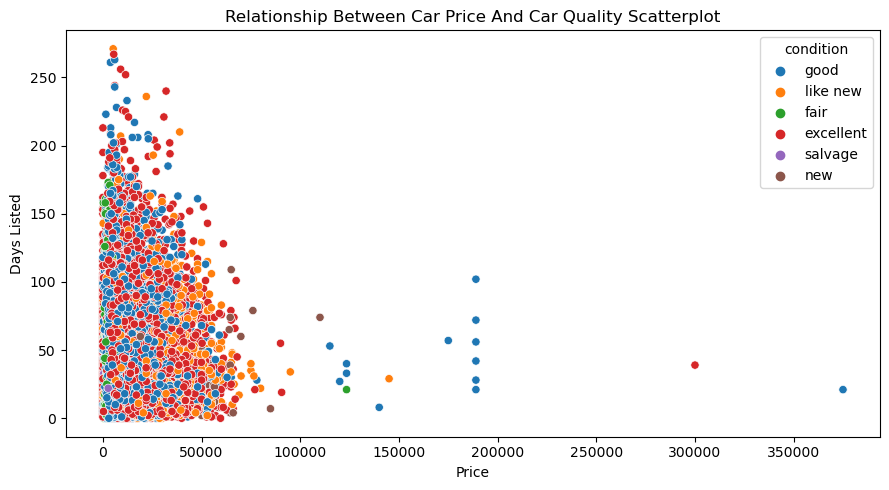

In [19]:
#Use matplotlib and seaborn in order to create a scatterplot that displays the relationship between
#car price and car quality.
plt.figure(figsize=(9,5))

sns.scatterplot(
    data=df,
    x='price',
    y='days_listed',
    hue='condition'
)

plt.title("Relationship Between Car Price And Car Quality Scatterplot")
plt.xlabel("Price")
plt.ylabel("Days Listed")
plt.tight_layout()
plt.show()

Scatterplot Result:  It appears that cars priced 50k and below sell faster than more expenisve cars. 

#### Cylinder Sizes/ Days Listed Relationship Scatterplot

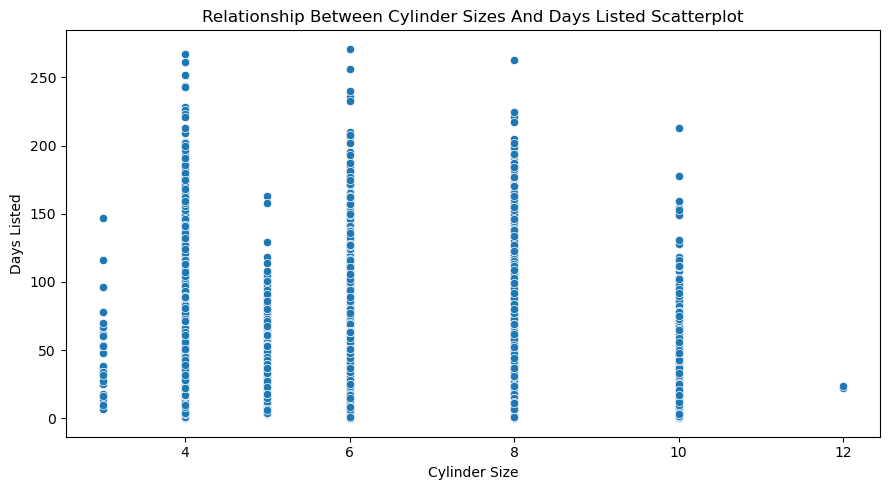

In [20]:
#Use matplotlib and seaborn in order to create a scatterplot that displays how cylinder sizes affect sales.
plt.figure(figsize=(9,5))

sns.scatterplot(
    data=df,
    x='cylinders',
    y='days_listed')

plt.title("Relationship Between Cylinder Sizes And Days Listed Scatterplot")
plt.xlabel("Cylinder Size")
plt.ylabel("Days Listed")
plt.tight_layout()
plt.show()

Scatterplot Result:  Although it appears that 12 cylinder cars have the least amount of days listed per car, 4 cylinder and 6 cylinder cars seem to have more entries overall.

#### Transmission Type/ Car Price Relationship Scatterplot

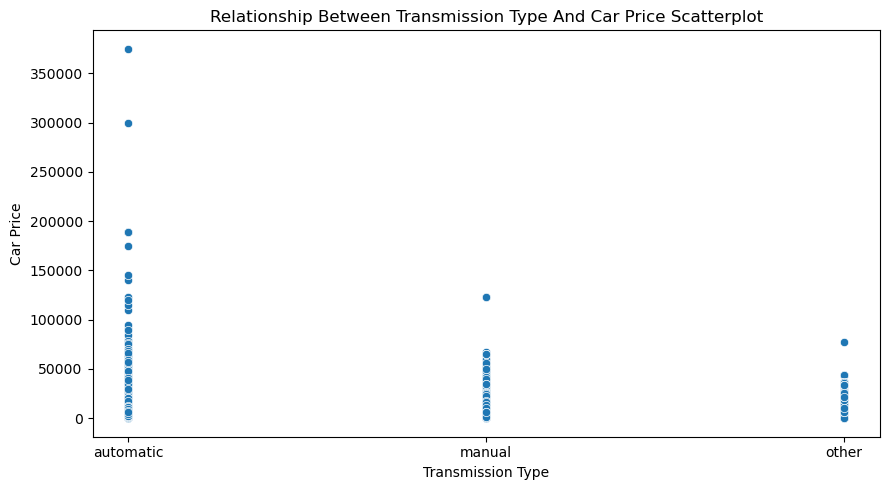

In [21]:
#Use matplotlib and seaborn in order to create a scatterplot that displays the relationship between 
#transmission type and car price.
plt.figure(figsize=(9,5))

sns.scatterplot(
    data=df,
    x='transmission',
    y='price')

plt.title("Relationship Between Transmission Type And Car Price Scatterplot")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price")
plt.tight_layout()
plt.show()

Scatterplot Result: It appears that automatic cars have more potential for earning profits if sold than cars with manual or other types of transmission.

#### Number Of Cars In The Lot Per Model Countplot

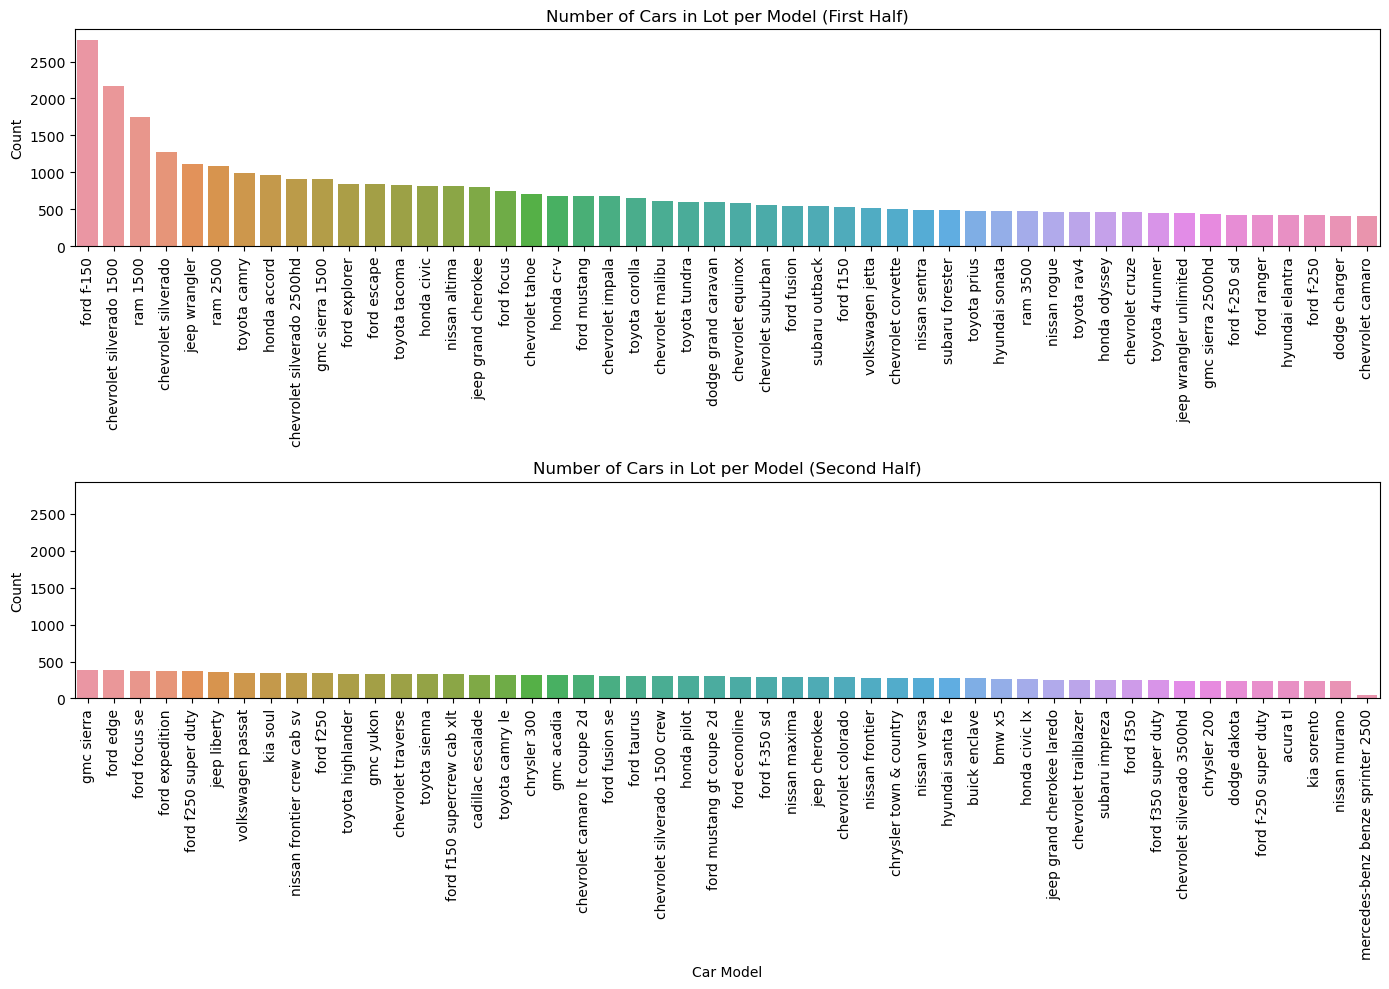

In [22]:
#Use matplotlib and seaborn to create two histograms (first half of values and second half of values) that
#display the count of number of cars in the lot per model.

# Split the models into two halves.
unique_models = df['model'].value_counts().index
midpoint = len(unique_models) // 2
first_half = unique_models[:midpoint]
second_half = unique_models[midpoint:]

fig, axes = plt.subplots(2, 1, figsize=(14,10), sharey=True)

# First half of models.
sns.countplot(
    data=df[df['model'].isin(first_half)],
    x='model',
    order=first_half,
    ax=axes[0]
)
axes[0].set_title("Number of Cars in Lot per Model (First Half)")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)

# Second half of models.
sns.countplot(
    data=df[df['model'].isin(second_half)],
    x='model',
    order=second_half,
    ax=axes[1]
)
axes[1].set_title("Number of Cars in Lot per Model (Second Half)")
axes[1].set_xlabel("Car Model")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Countplot Result:  It appears that the car company had the most listings of Hyundai Sonata cars and the company had the least listings
of Chrysler 300 cars.

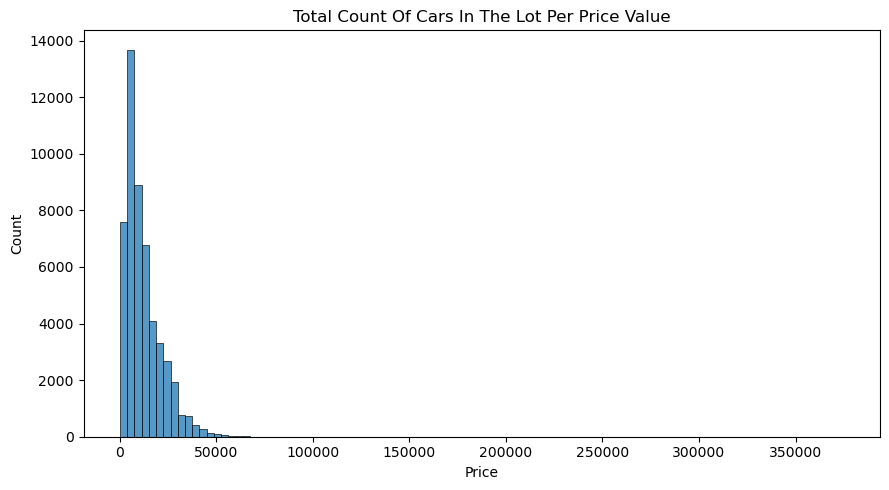

In [23]:
#Use matplotlib and seaborn to create a histogram that displays the total count of cars
#in the lot per price value.
plt.figure(figsize=(9,5))

sns.histplot(
    data=df,
    x='price',
    bins=100,
)

plt.title("Total Count Of Cars In The Lot Per Price Value")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

Histogram Result:  It appears that the car company had the most listings of cars priced at approximately $10-15k and the least amount of listings of cars priced $50k and above.

#### Histogram Of Total Count Of Car Listed Per Car Condition

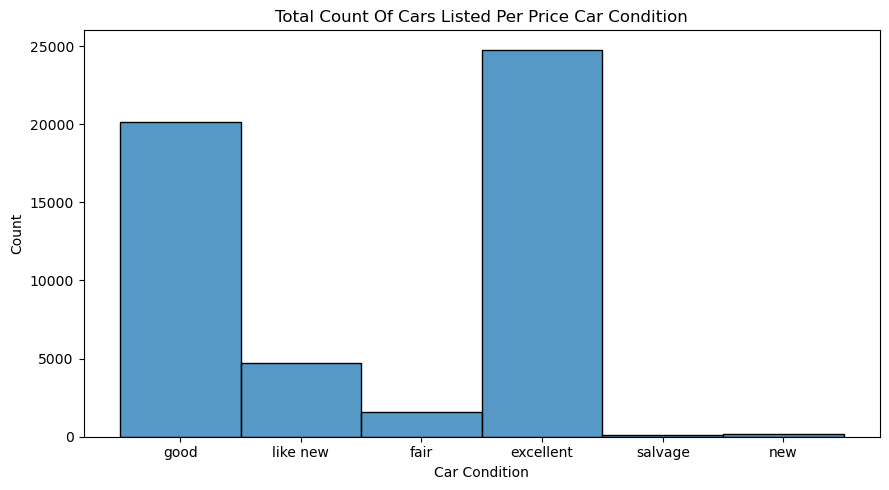

In [24]:
#Use matplotlib and seaborn to create a histogram that displays the total count of cars
#listed per car condtion.
plt.figure(figsize=(9,5))

sns.histplot(
    data=df,
    x='condition',
    bins=30,
)

plt.title("Total Count Of Cars Listed Per Price Car Condition")
plt.xlabel("Car Condition")
plt.tight_layout()
plt.show()

Code Result:  It appears that the car company had the most amount of listings of cars with excellent condition and the least amount of listings of cars with salvage or new conditions.